<a href="https://colab.research.google.com/github/MaliniVibin1502/pythonprojects/blob/main/nutritionanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory analysis of Nutritional facts as per the McDonald's India Menu. Using Python and SQL for the exploratory analysis. The data set used in this project has been obtained from the nutritional facts for McDonald's menu from Kaggle


In [ ]:
!pip install sqlite3
import pandas as pd
import sqlite3


In [42]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import scipy.stats as stat

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/MaliniVibin1502/SQL-projects/main/India_Menu.csv")
data

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Condiments Menu,Tomato Ketchup Sachets,8 g,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05
137,Condiments Menu,Maple Syrup,30 g,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
138,Condiments Menu,Cheese Slice,14 g,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95
139,Condiments Menu,Sweet Corn,40 g,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04


In [8]:
conn=sqlite3.connect("McDonalds.db")
cursor_obj=conn.cursor()

In [ ]:
data.to_sql("MCDONALD_NUTRITION", conn)

In [12]:
df=pd.read_sql("SELECT * FROM MCDONALD_NUTRITION", conn)
df

,index,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,Condiments Menu,Tomato Ketchup Sachets,8 g,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05
137,137,Condiments Menu,Maple Syrup,30 g,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
138,138,Condiments Menu,Cheese Slice,14 g,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95
139,139,Condiments Menu,Sweet Corn,40 g,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04


In [13]:
df.shape

(141, 14)

In [14]:
df.describe(include ='all')

,index,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141.000000,141,141,141,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
unique,NaN,7,141,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,McCafe Menu,McVeggie™ Burger,299 ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,51,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,70.000000,NaN,NaN,NaN,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,40.847277,NaN,NaN,NaN,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,NaN,NaN,NaN,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,70.000000,NaN,NaN,NaN,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,105.000000,NaN,NaN,NaN,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000


Finding out which food item as the highest sodium content

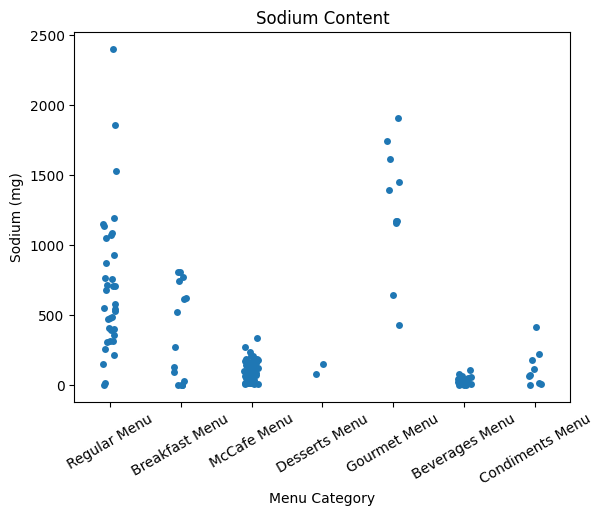

In [31]:
plot=sb.stripplot(x='Menu Category', y='Sodium (mg)', data=df)
plt.setp(plot.get_xticklabels(), rotation=30)
plt.title("Sodium Content")
plt.show()

In [35]:
df['Sodium (mg)'].describe()

count     140.000000
mean      362.064143
std       473.160490
min         0.000000
25%        43.895000
50%       152.025000
75%       534.240000
max      2399.490000
Name: Sodium (mg), dtype: float64

Find the idex value of the maximum value of Sodium recorded

In [36]:
df['Sodium (mg)'].idxmax()

18

In [37]:
df.at[18,'Menu Items']

'Ghee Rice with Mc Spicy Fried Chicken 1 pc'

Further exploratory analysis of the data

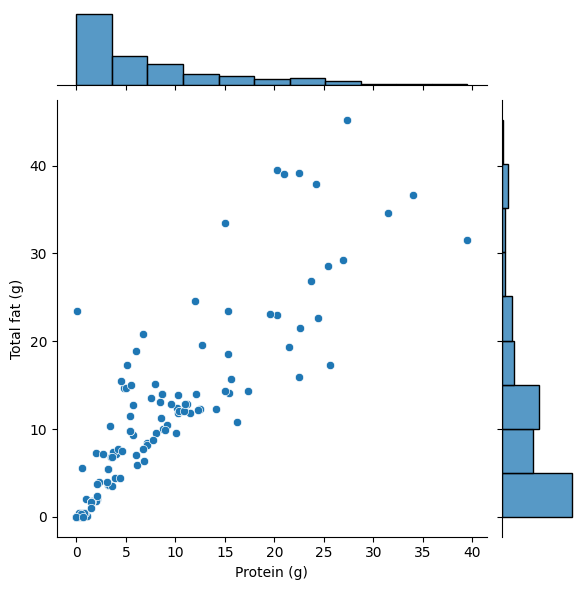

In [50]:
sb.jointplot(x='Protein (g)', y='Total fat (g)', data=df)


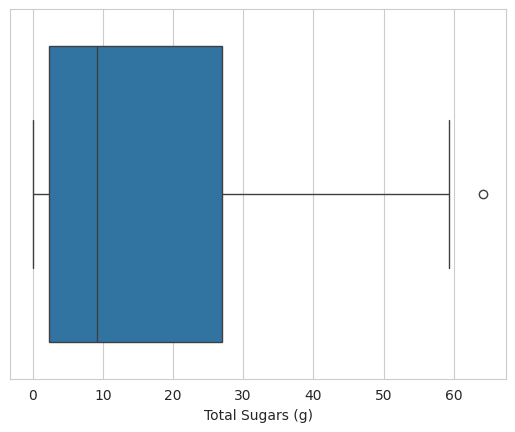

In [53]:
plot=sb.set_style("whitegrid")
sb.boxplot(x=df['Total Sugars (g)'])
plot